<a href="https://colab.research.google.com/github/EndarMuh/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Muhammad Endar Darmawan

Kelas : TI - 3F

Absen : 21

NIM   : 2141720160

# F. Tugas Praktikum

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


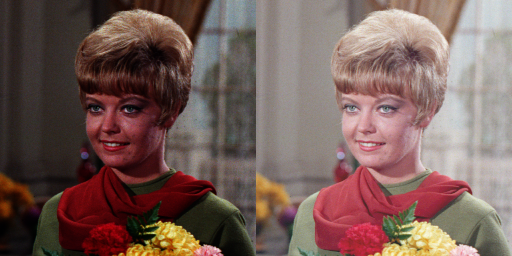

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
# -----------------------------------------------------
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111).Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

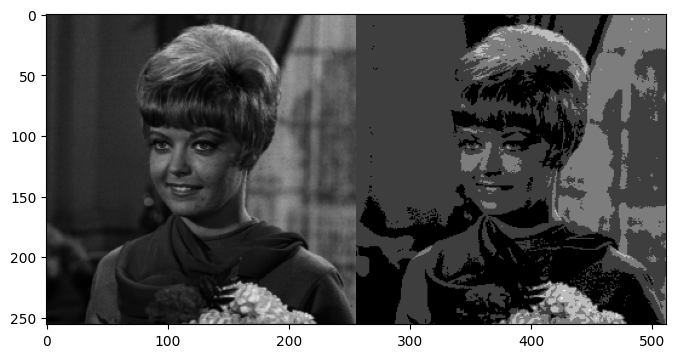

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

bit_depth=2

level = 255/(2**bit_depth)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

# Menampilkan gambar
plt.figure(figsize=(8, 6))

# Menggabungkan gambar asli dan depth_image
combined_image = np.concatenate((original, depth_image), axis=1)

# Menampilkan gambar gabungan
plt.imshow(combined_image, cmap='gray', vmin=0, vmax=255)
plt.axis('on')

plt.show()

**3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada **/images/galaxy.jpg**.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).

Nilai PSNR adalah 27.53459041480952 (dB)


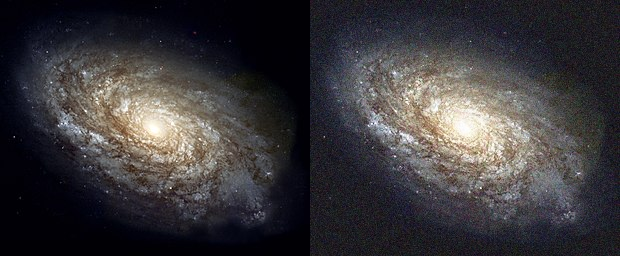

In [14]:
# 1. Jumlah Citra di Average = 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.553563734904603 (dB)


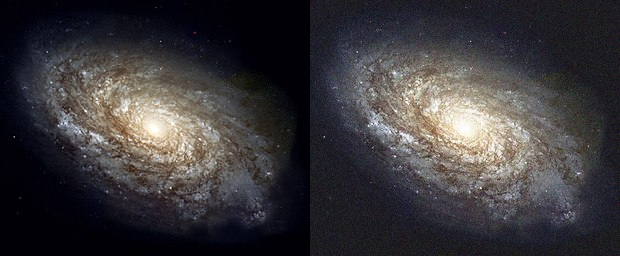

In [19]:
# 2. Jumlah Citra di Average = 10

dst = cv_img[0]
noise_number = 9
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.54007371585204 (dB)


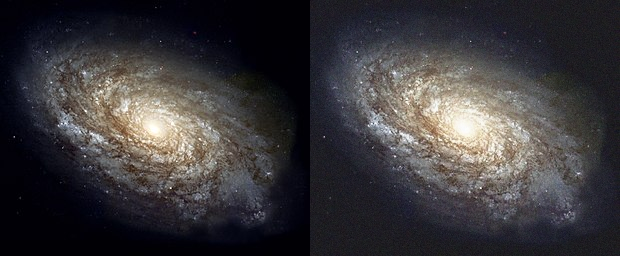

In [21]:
# 3. Jumlah Citra di Average = 20

dst = cv_img[0]
noise_number = 19
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.50889379476773 (dB)


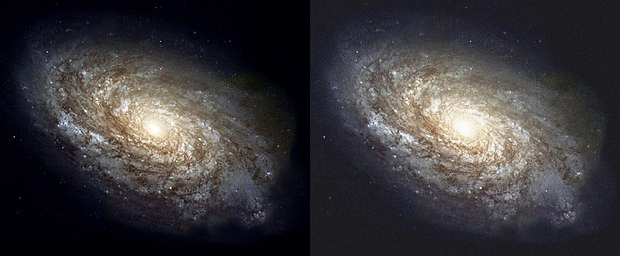

In [22]:
# 4. Jumlah Citra di Average = 40

dst = cv_img[0]
noise_number = 39
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.518888362938995 (dB)


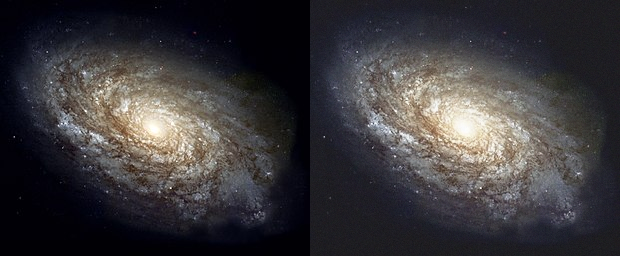

In [23]:
# 5. Jumlah Citra di Average = 80

dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.51936244679446 (dB)


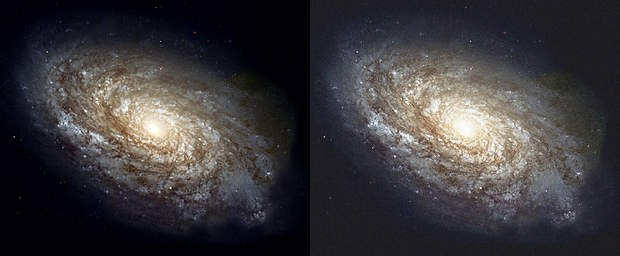

In [24]:
# 6. Jumlah Citra di Average = 100

dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.


- Semakin tinggi nilai PSNR, semakin baik kualitas gambar hasil denoising. Nilai PSNR yang tinggi menandakan bahwa perbedaan antara gambar asli dan gambar denoised sangat kecil.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

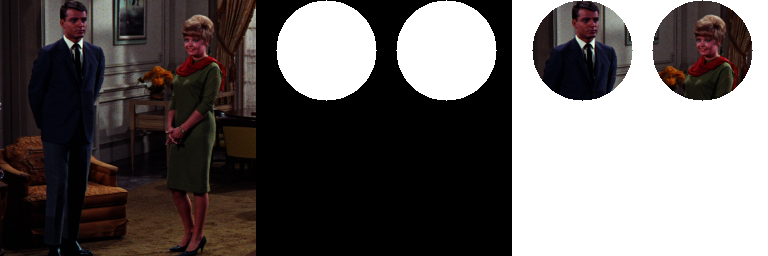

In [29]:
import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'AND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = couple_image & mask

# membuat background result_image menjadi putih
result_image[np.where((result_image == [0,0,0]).all(axis=2))] = [255,255,255]

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

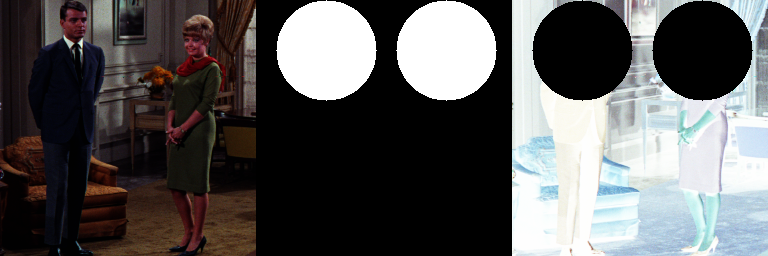

In [37]:
# NOT (komplemen)

import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'NOT' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = ~couple_image & ~mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

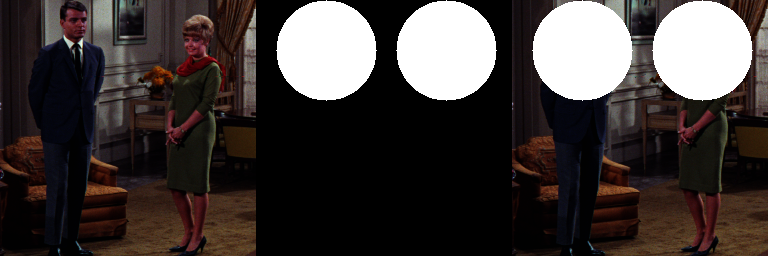

In [41]:
# OR (atau)

import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'AND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = couple_image | mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

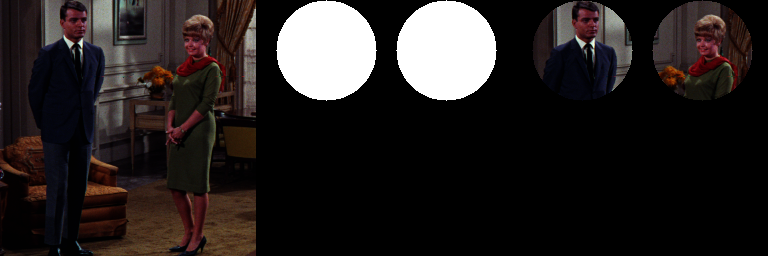

In [42]:
# AND (dan)

import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'AND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = couple_image & mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

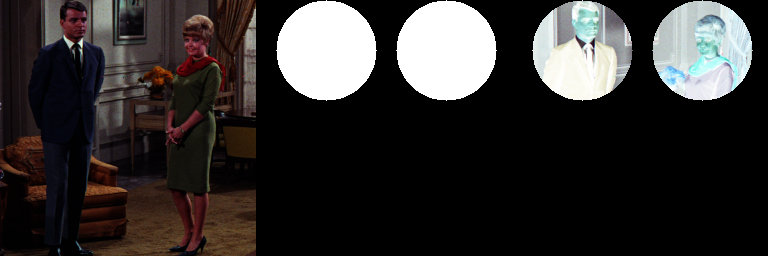

In [44]:
# NAND (Not And)

import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'AND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = ~couple_image & mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

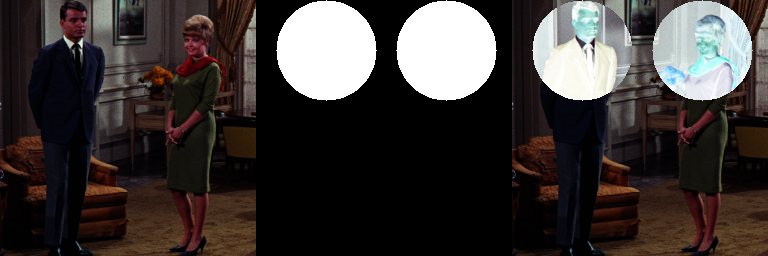

In [45]:
# XOR (Exclusive Or)

import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK_2023/Pertemuan_5/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'AND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = couple_image ^ mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

Tuliskan hasil analisa anda:

- NOT (Komplemen)
1. Operator NOT (~ atau cv2.bitwise_not()) digunakan untuk membalikkan warna citra.
2. Dalam kasus ini, operator NOT digunakan untuk membalikkan warna hasil overlay pada citra.
3. Hasilnya adalah citra dengan bagian yang tumpang tindih antara citra asli dan lingkaran pada mask menjadi terbalik warnanya.

- OR (Atau)
1. Operator OR (|) digunakan untuk menggabungkan dua citra dengan mengambil bagian yang ada di salah satu citra atau kedua citra tersebut.
2. Dalam kasus ini, operator OR tidak digunakan dalam potongan kode yang diberikan.

- AND (Dan)
1. Operator AND (&) digunakan untuk menggabungkan dua citra dengan mengambil bagian yang sama antara kedua citra tersebut.
2. Dalam kasus ini, operator AND digunakan untuk menggabungkan lingkaran pada mask dengan citra asli.
3. Hasilnya adalah bagian yang tumpang tindih antara citra asli dan lingkaran pada mask.

- NAND (Not And)
1. Operator NAND (~ &) merupakan gabungan antara operator AND (&) dan operator NOT (~)

- XOR (Exclusive Or)
1. Operator XOR (^) digunakan untuk menggabungkan dua citra dengan mengambil bagian yang berbeda antara kedua citra tersebut.
2. Dalam kasus ini, operator XOR digunakan untuk menggabungkan lingkaran pada mask dengan citra asli.
3. Hasilnya adalah gabungan dari citra asli dengan lingkaran pada mask.